In [1]:
# merge new statistics as a sum-up file
import pandas as pd 
import os,glob
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import hydroeval as he
from matplotlib.colors import LogNorm
from pylab import *
import pandas as pd 
from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor
import sklearn.neural_network as nn

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
def merge_xls(filelist):
    df = pd.DataFrame()
    for file in filelist:
        df = df.append(pd.read_excel(file),ignore_index = True)
    return df

def link_newstat(oldfile,newfile):
    df_1 =  pd.read_excel(oldfile)
    df_1['I_slope'] = df_1['I_slope'].round(3)
    df_1 = df_1.drop_duplicates(keep = 'last')
    df_1 = df_1.reset_index(drop = True)
    
    df_2 =  pd.read_excel(newfile)
    df_2 = df_2.rename(columns={'mean':'mean_bio'})
    df_2.loc[:,'mean_copy'] = df_2['mean_bio']

    df_1['mean_bio'] = df_1['mean_bio'].round(1)
    df_1['mu'] = df_1['mu'].round(3)
    df_1['alpha'] = df_1['alpha'].round(3)
    df_1['I_slope'] = df_1['I_slope'].round(3)

    df_2['mean_bio'] = df_2['mean_bio'].round(1)
    df_2['mu'] = df_2['mu'].round(3)
    df_2['alpha'] = df_2['alpha'].round(3)
    df_2['I_slope'] = df_2['I_slope'].round(3)

    df_3 = pd.merge(df_1,df_2, how='inner', on=['mu','alpha','I_slope','mean_bio'])
    df_3 = df_3.drop(['entropy','mean_copy'],axis=1)
    return df_3



In [2]:
allfile = 'Merged_all_statistics_a_[1:1.8]_Kb[0.025:0.025:0.20].csv'
df_1 = pd.read_csv(allfile)
df_1 = df_1.iloc[: , 1:]

df_2=df_1[df_1.columns[[0,2,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22]]]
df_3 = df_2.loc[(df_2['Shuffle_index'] > 0)].reset_index(drop = True)
df_all= df_3.drop(['entropy','Shuffle_index'],axis=1)
#df_all = df_all.rename(columns={'beta':'I_slope'})
new_column_names = {'mean_bio':'AGBmean',
                    'median_bio':'AGBmed',
                    'range_bio':'AGBrange',
                    'var_bio':'AGBvar',
                    'std_bio':'AGBstd',
                    'cv_bio':'AGBcv',
                    'skew_bio':'AGBskew',
                    'kurt_bio':'AGBkurt',
                    'prc25_bio':'AGBp25',
                    'prc75_bio':'AGBp75',
                    'Trimean':'AGBtrim'}
df_all = df_all.rename(columns=new_column_names)
df_all


,mu,alpha,beta,AGBmean,AGBmed,AGBrange,AGBvar,AGBstd,AGBcv,AGBskew,AGBkurt,AGBp25,AGBp75,AGBtrim,shannon,contrast,correlation,energy,homogeneity,GPP
0,0.01,1.0,0.03,63986.322399,59028.236431,58949.400171,5.931834e+08,24355.356743,38.063380,1.188010,4.983611,46631.090242,76066.919474,60188.620645,6.027048,0.798060,0.094559,0.179703,0.718233,3608.962037
1,0.01,1.0,0.03,64031.516724,59097.630962,59109.505208,5.971674e+08,24437.008046,38.164031,1.180695,4.959729,46567.513915,76171.516012,60233.572963,6.017359,0.786682,0.096081,0.181314,0.720076,3608.962037
2,0.01,1.0,0.03,64013.785185,59055.623973,59033.217744,5.957485e+08,24407.959963,38.129225,1.188280,5.003900,46609.294991,76134.670087,60213.803256,6.029614,0.799546,0.095607,0.179243,0.718088,3608.962037
3,0.01,1.0,0.03,64007.645940,59058.171540,58997.150352,5.940870e+08,24373.900048,38.079670,1.184858,4.970999,46628.630203,76093.116751,60209.522509,6.024673,0.797667,0.096236,0.179198,0.718270,3608.962037
4,0.01,1.0,0.03,64000.084410,59050.800538,58942.426351,5.947735e+08,24387.977738,38.106165,1.195154,5.055522,46612.022286,76055.006423,60192.157446,5.967907,0.754387,0.091225,0.188027,0.723952,3608.962037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856795,0.05,1.8,0.50,2168.595845,1982.197330,2303.227717,9.070326e+05,952.382588,43.917016,1.273174,7.099811,1485.315506,2645.242918,2023.738271,4.854104,0.094883,0.010138,0.821788,0.953435,1036.651024
856796,0.05,1.8,0.50,2168.565177,1982.239475,2302.672165,9.065407e+05,952.124286,43.905726,1.265620,6.939500,1485.946588,2645.567485,2023.998256,4.853494,0.095788,0.011712,0.819913,0.952960,1036.479177
856797,0.05,1.8,0.50,2168.734047,1982.663460,2306.921325,9.042121e+05,950.900688,43.845887,1.224072,6.100183,1485.348360,2647.185536,2024.465204,5.095650,0.187182,0.019071,0.663552,0.908192,1036.672155
856798,0.05,1.8,0.50,2169.204842,1982.684454,2305.308880,9.102774e+05,954.084591,43.983149,1.289316,7.100532,1485.925662,2646.158339,2024.363227,5.177724,0.223004,0.024525,0.608851,0.891582,1036.728214


# 1. Multi_output

In [5]:
def Multi_1(df_train, df_test):
    
    
    df = df_train
    j = df_train.shape[1]
    df_x = df.iloc[:,3:j]
    df_y = df.iloc[:,0:3]

    x = df_x.values
    y = df_y.values

    # define model

    model = RandomForestRegressor(n_jobs = -1)
    # fit model
    model.fit(x, y)

    # validation

    df_v =  df_test
    df_vx = df_v.iloc[:,3:j]
    df_vy = df_v.iloc[:,0:3]

    # make a prediction
    yhat = model.predict(df_vx)
    # summarize prediction
    #print(yhat[0])

    y_pre = pd.DataFrame(yhat)

    mu_nse = he.evaluator(he.nse,y_pre.iloc[:,0],df_vy.iloc[:,0])
    Is_nse = he.evaluator(he.nse,y_pre.iloc[:,2],df_vy.iloc[:,2])
    a_nse = he.evaluator(he.nse,y_pre.iloc[:,1],df_vy.iloc[:,1])
    return mu_nse,Is_nse,a_nse, model

In [8]:
matplotlib.__version__

'3.4.2'

## Feature importance

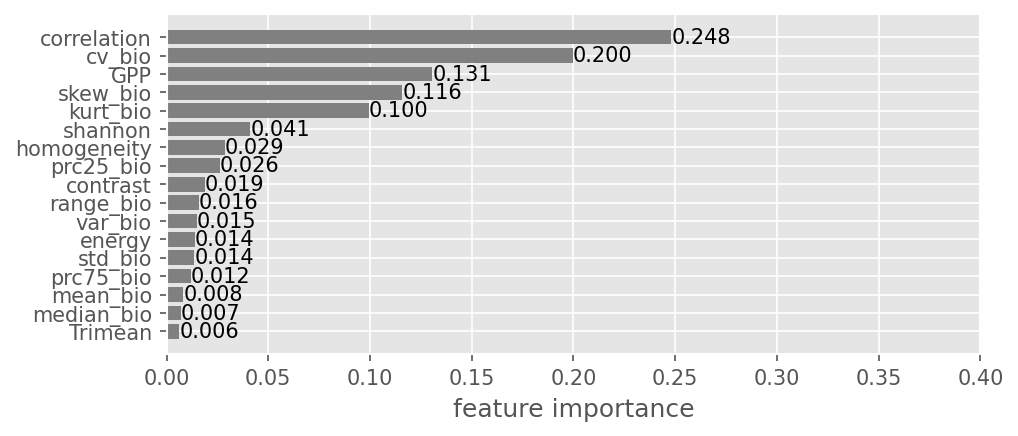

Multi-Output: 
    Mu:0.9510126796640134 
    Beta:0.968454634880619 
    Alpha:0.9401391043161393 



In [27]:
# for one fold
plt.style.use('ggplot')
allnames = list(df_all.columns.values.tolist())
my_cv = ShuffleSplit(n_splits = 10,test_size = .1)
index = 1
train_index = []
test_index = []

Multi_mus = []
Multi_Iss = []
Multi_as = []

for train, test in my_cv.split(df_all.values):
    type(train)
    train_index.append(train)
    test_index.append(test)

for i in range(0,len(train_index)):
    i=2
    fig, ax = plt.subplots(figsize=(7,3))
    
    df_train = df_all.iloc[train_index[i]]
    df_test = df_all.iloc[test_index[i]]
    #print('Shuffle No.{}'.format(i+1),'\n','Multi-Output:')
    a,b,c,model = Multi_1(df_train, df_test)
    Multi_mus.append(a)
    Multi_Iss.append(b)
    Multi_as.append(c)
    importance = model.feature_importances_
    names = allnames[3:]
    #plt.barh(names,importance)
    feature_importances = pd.DataFrame(importance, index = names, columns=['importance']).sort_values('importance')
    plt.rcParams['figure.dpi'] = 300
    #plt.rcParams['figure.figsize'] = (5,4)
    #feature_importances.plot(ax=ax,xlim=[0,0.5],kind = 'barh')
    bars = ax.barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'
    #ax.invert_yaxis() 
    ax.bar_label(bars,fmt='%.3f')
    ax.set_xlim(right=0.4)
    ax.set_xlabel('feature importance')
    plt.savefig('./newplot/Kb[0.025:0.2]/barh.png',dpi=300, bbox_inches = 'tight')
    plt.show()
    break
print('Multi-Output:','\n','  ','Mu:{}'.format(np.mean(Multi_mus)),'\n','  ',
    'Beta:{}'.format(np.mean(Multi_Iss)),'\n','  ',
    'Alpha:{}'.format(np.mean(Multi_as)),'\n')

/User/homes/swang/miniconda3/envs/jupyter2/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Stored 'feature_importances' (DataFrame)


/tmp/ipykernel_1779/1567830571.py:25: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bars = ax.barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'


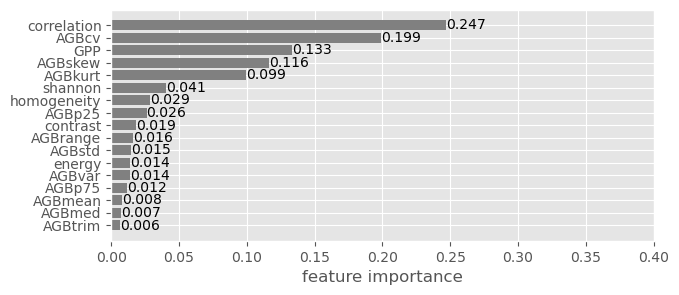

Multi-Output: 
    Mu:0.9933325640056021 
    Beta:0.9957244986419844 
    Alpha:0.991846078893363 



In [6]:
# for all training data
plt.style.use('ggplot')
allnames = list(df_all.columns.values.tolist())
index = 1

Multi_mus = []
Multi_Iss = []
Multi_as = []

fig, ax = plt.subplots(figsize=(7,3))

#print('Shuffle No.{}'.format(i+1),'\n','Multi-Output:')
a,b,c,model = Multi_1(df_all, df_all)
Multi_mus.append(a)
Multi_Iss.append(b)
Multi_as.append(c)
importance = model.feature_importances_
names = allnames[3:]
#plt.barh(names,importance)
feature_importances = pd.DataFrame(importance, index = names, columns=['importance']).sort_values('importance')
%store feature_importances
plt.rcParams['figure.dpi'] = 300
#plt.rcParams['figure.figsize'] = (5,4)
#feature_importances.plot(ax=ax,xlim=[0,0.5],kind = 'barh')
bars = ax.barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'
#ax.invert_yaxis() 
ax.bar_label(bars,fmt='%.3f')
ax.set_xlim(right=0.4)
ax.set_xlabel('feature importance')
#plt.savefig('./barh.png',dpi=300, bbox_inches = 'tight')
plt.show()
    #break
print('Multi-Output:','\n','  ','Mu:{}'.format(np.mean(Multi_mus)),'\n','  ',
    'Beta:{}'.format(np.mean(Multi_Iss)),'\n','  ',
    'Alpha:{}'.format(np.mean(Multi_as)),'\n')

In [7]:
%store feature_importances

Stored 'feature_importances' (DataFrame)


In [5]:
%store -r feature_importances

no stored variable or alias feature_importances


## Reducing the number of input features

cost a while to do this 
check the python script, feature_importance.py
the outputs are 
1. NSE_mu_2d.txt
2. NSE_a_2d.txt
3. NSE_b_2d.txt

In [12]:
import numpy as np

# Load the file using numpy.loadtxt()
NSE_mu_2d = np.loadtxt('NSE_mu_2d.txt', delimiter=",")
NSE_a_2d = np.loadtxt('NSE_a_2d.txt', delimiter=",")
NSE_b_2d = np.loadtxt('NSE_b_2d.txt', delimiter=",")

In [13]:
%store NSE_mu_2d
%store NSE_a_2d
%store NSE_b_2d

Stored 'NSE_mu_2d' (ndarray)
Stored 'NSE_a_2d' (ndarray)
Stored 'NSE_b_2d' (ndarray)


/tmp/ipykernel_1779/2586572116.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bars = axs[0].barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'
/tmp/ipykernel_1779/2586572116.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(x,rotation=45)


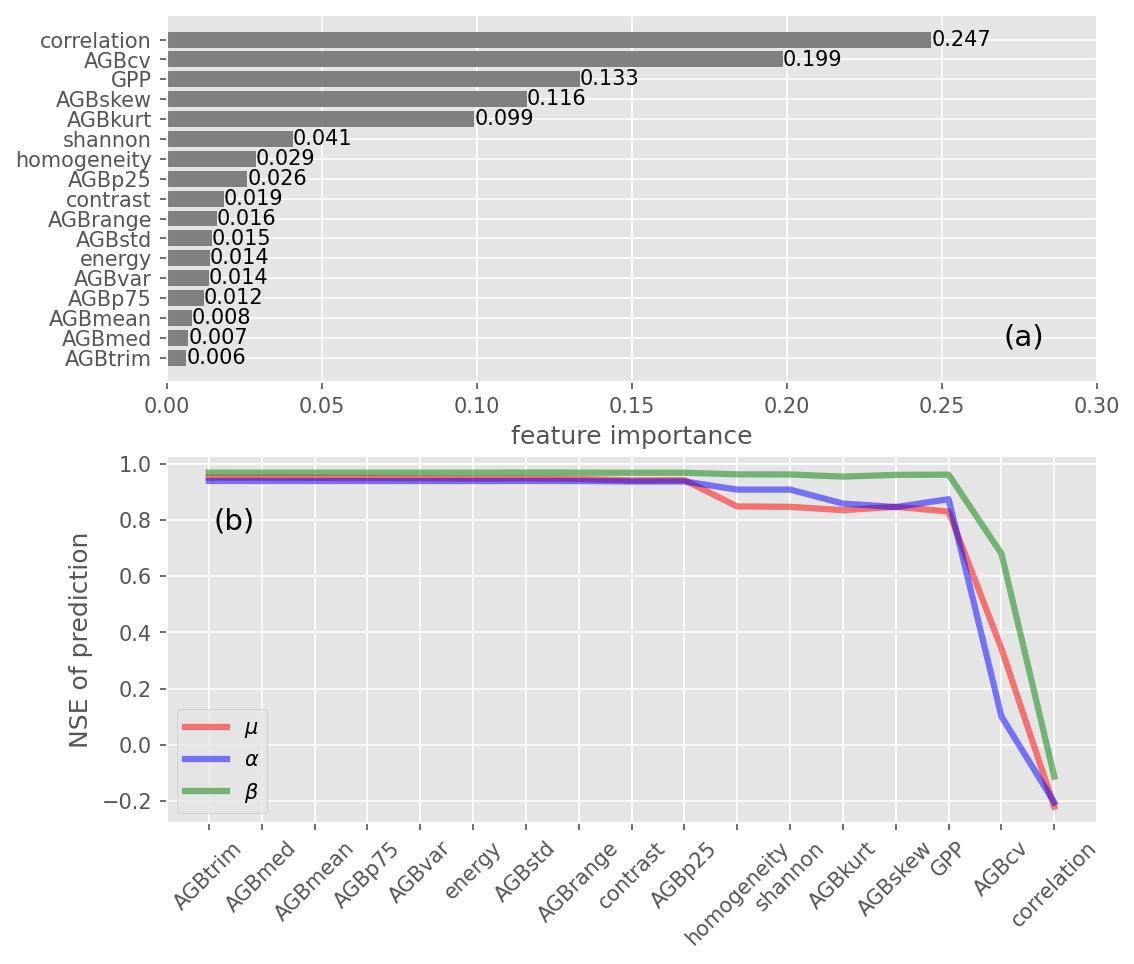

In [14]:

fig,axs = plt.subplots(2,1,figsize=(8,7),dpi=150)
bars = axs[0].barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'
#ax.invert_yaxis() 
axs[0].bar_label(bars,fmt='%.3f')
axs[0].set_xlim(right=0.3)
axs[0].set_xlabel('feature importance')
axs[0].text(0.9,0.1,'(a)',fontsize=14, transform=axs[0].transAxes)
    
    
all_features = feature_importances.index
x = list(all_features)

#ax.invert_yaxis() 
axs[1].plot(x,np.mean(NSE_mu_2d, axis=0),c = 'r',linewidth=3,alpha=0.5,label = r'$ \mu$')
axs[1].plot(x,np.mean(NSE_a_2d, axis=0),c = 'b',linewidth=3,alpha=0.5,label =  r'$ \alpha$')
axs[1].plot(x,np.mean(NSE_b_2d, axis=0),c = 'g',linewidth=3,alpha=0.5,label =  r'$ \beta$')
#ax.set_ylim(bottom=0)
axs[1].set_xticklabels(x,rotation=45)
axs[1].set_ylabel('NSE of prediction')
axs[1].legend(loc='lower left')
axs[1].text(0.05,0.8,'(b)',fontsize=14, transform=axs[1].transAxes)
#plt.rcParams["legend.loc"] = 'lower left'

plt.savefig('./Figure7.png',bbox_inches = 'tight')
plt.show()

original 1 fold feature importance result

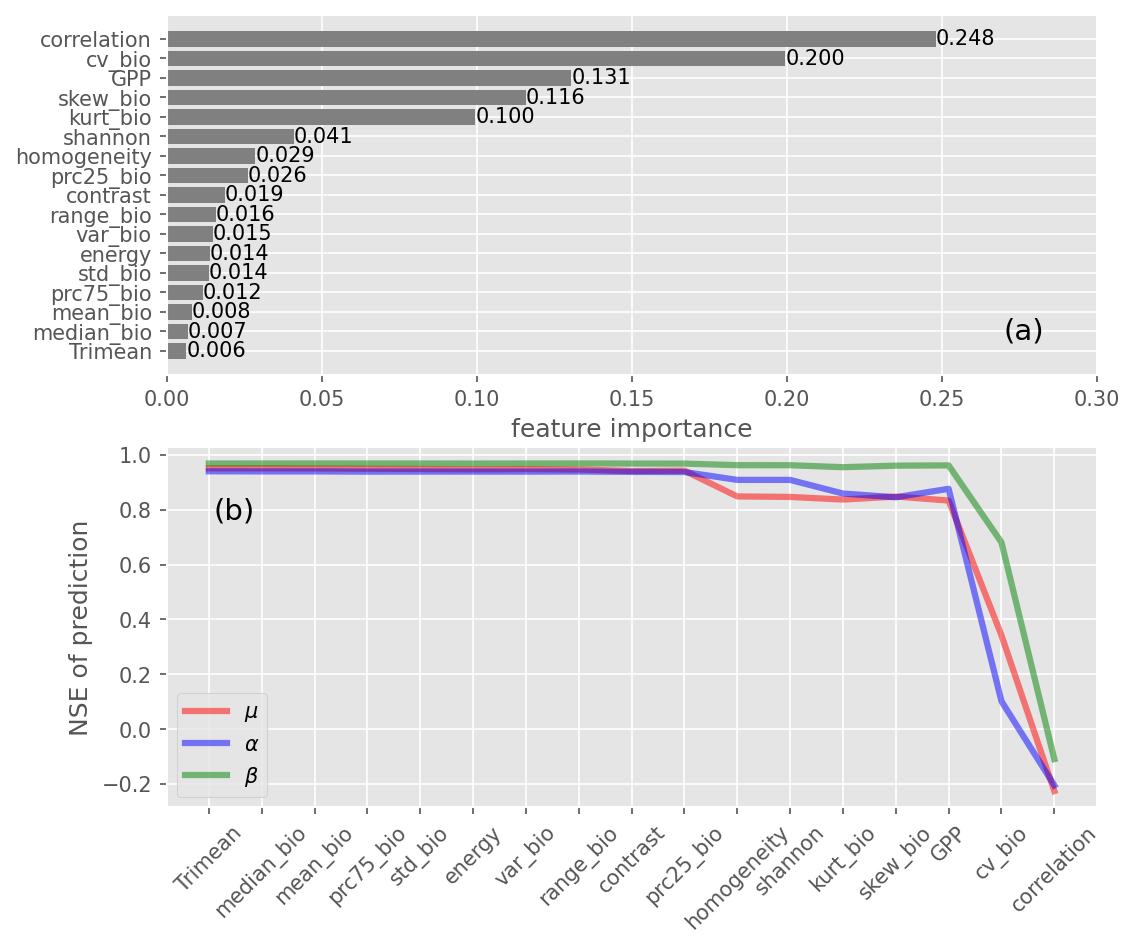

In [53]:
# Single_mu = [0.9510126796640134]
# Single_a = [0.9401391043161393]
# Single_beta = [0.968454634880619]
# NSE_mus = np.concatenate((Single_mu,np.array(Multi_mus).flatten()))
# NSE_alpha = np.concatenate((Single_a,np.array(Multi_as).flatten()))
# NSE_beta = np.concatenate((Single_beta,np.array(Multi_Iss).flatten()))

# fig,axs = plt.subplots(2,1,figsize=(8,7),dpi=150)
# bars = axs[0].barh(feature_importances.index.ravel(),feature_importances.values.ravel(),color='gray')#color='#0057b7'
# #ax.invert_yaxis() 
# axs[0].bar_label(bars,fmt='%.3f')
# axs[0].set_xlim(right=0.3)
# axs[0].set_xlabel('feature importance')
# axs[0].text(0.9,0.1,'(a)',fontsize=14, transform=axs[0].transAxes)
    
    
# all_features = feature_importances.index
# x = list(all_features)

# #ax.invert_yaxis() 
# axs[1].plot(x,NSE_mus,c = 'r',linewidth=3,alpha=0.5,label = r'$ \mu$')
# axs[1].plot(x,NSE_alpha,c = 'b',linewidth=3,alpha=0.5,label =  r'$ \alpha$')
# axs[1].plot(x,NSE_beta,c = 'g',linewidth=3,alpha=0.5,label =  r'$ \beta$')
# #ax.set_ylim(bottom=0)
# axs[1].set_xticklabels(x,rotation=45)
# axs[1].set_ylabel('NSE of prediction')
# axs[1].legend(loc='lower left')
# axs[1].text(0.05,0.8,'(b)',fontsize=14, transform=axs[1].transAxes)
# #plt.rcParams["legend.loc"] = 'lower left'

# plt.savefig('./Figure7.png',bbox_inches = 'tight')
# plt.show()

# 2. Single_output

In [29]:
def SingleRF_1 (df_train, df_test, target):
    import warnings
    import hydroeval as he
    import numpy as np
    warnings.filterwarnings('ignore')
    if target == 'mu':
        j = 0
    elif target == 'beta':
        j = 2
    elif target == 'alpha':
        j = 1
    else:
        print('Wrong inputs for types of target variable!! Please enter mu, beta, alpha or k!')
    
    df_train = df_train.reset_index(drop = True)
     
    x_train = df_train.iloc[:,3:]
    y_train = df_train.iloc[:,j]
    x_test = df_test.iloc[:,3:]
    y_test = df_test.iloc[:,j]

    # fit model1
    model = RandomForestRegressor(n_jobs = -1)
    model.fit(x_train.values, y_train.values)   

    # predict the mu and Is by shuffle i+1
    M_pre = model.predict(x_test.values)

    r2 = r2_score(y_test, M_pre)
   
    nse = he.evaluator(he.nse,M_pre,y_test)
    
    return nse,model
    

In [20]:
df_all = df_all.reset_index(drop = True)
allnames = list(df_all.columns.values.tolist())
#plt.rcParams['figure.dpi'] = 120
my_cv = ShuffleSplit(n_splits = 10,test_size = .1)
index = 1
train_index = []
test_index = []

Single_mus = []
Single_alphas = []
Single_betas = []
for train, test in my_cv.split(df_all.values):
    type(train)
    train_index.append(train)
    test_index.append(test)

for i in range(0,len(train_index)):
    i=2
    
    df_train = df_all.iloc[train_index[i]]
    df_test = df_all.iloc[test_index[i]]
    #print('Shuffle No.{}'.format(i+1),'\n','Multi-Output:')
    mu_nse,mu_model = SingleRF_1(df_train, df_test, 'mu')
    mu_importance = mu_model.feature_importances_
    names = allnames[3:]
    feature_importances1 = pd.DataFrame(mu_importance, index = names, columns=['importance']).sort_values('importance')

    Single_mus.append(mu_nse)
    
    
    alpha_nse,alpha_model = SingleRF_1(df_train, df_test, 'alpha')
    alpha_importance = alpha_model.feature_importances_
    names = allnames[3:]
    feature_importances2 = pd.DataFrame(alpha_importance, index = names, columns=['importance']).sort_values('importance')
    Single_alphas.append(alpha_nse)
    
    beta_nse,beta_model = SingleRF_1(df_train, df_test, 'beta')
    beta_importance = beta_model.feature_importances_
    names = allnames[3:]
    feature_importances3 = pd.DataFrame(beta_importance, index = names, columns=['importance']).sort_values('importance')
    Single_betas.append(beta_nse)

    break
    
print('Single RF:','\n','  ','Mu:{}'.format(np.mean(Single_mus)),'\n','  ',
      'Alpha:{}'.format(np.mean(Single_alphas)),'\n','  ',
      'Beta:{}'.format(np.mean(Single_betas)),'\n',' ')


Single RF: 
    Mu:0.9893593185494581 
    Alpha:0.9299016539190212 
    Beta:0.9831871454829341 
  


In [22]:
all_features_mu = mu_nse 
all_features_a = alpha_nse 
all_features_b = beta_nse 
%store all_features_mu
%store all_features_a 
%store all_features_b

Stored 'all_features_mu' (ndarray)
Stored 'all_features_a' (ndarray)
Stored 'all_features_b' (ndarray)


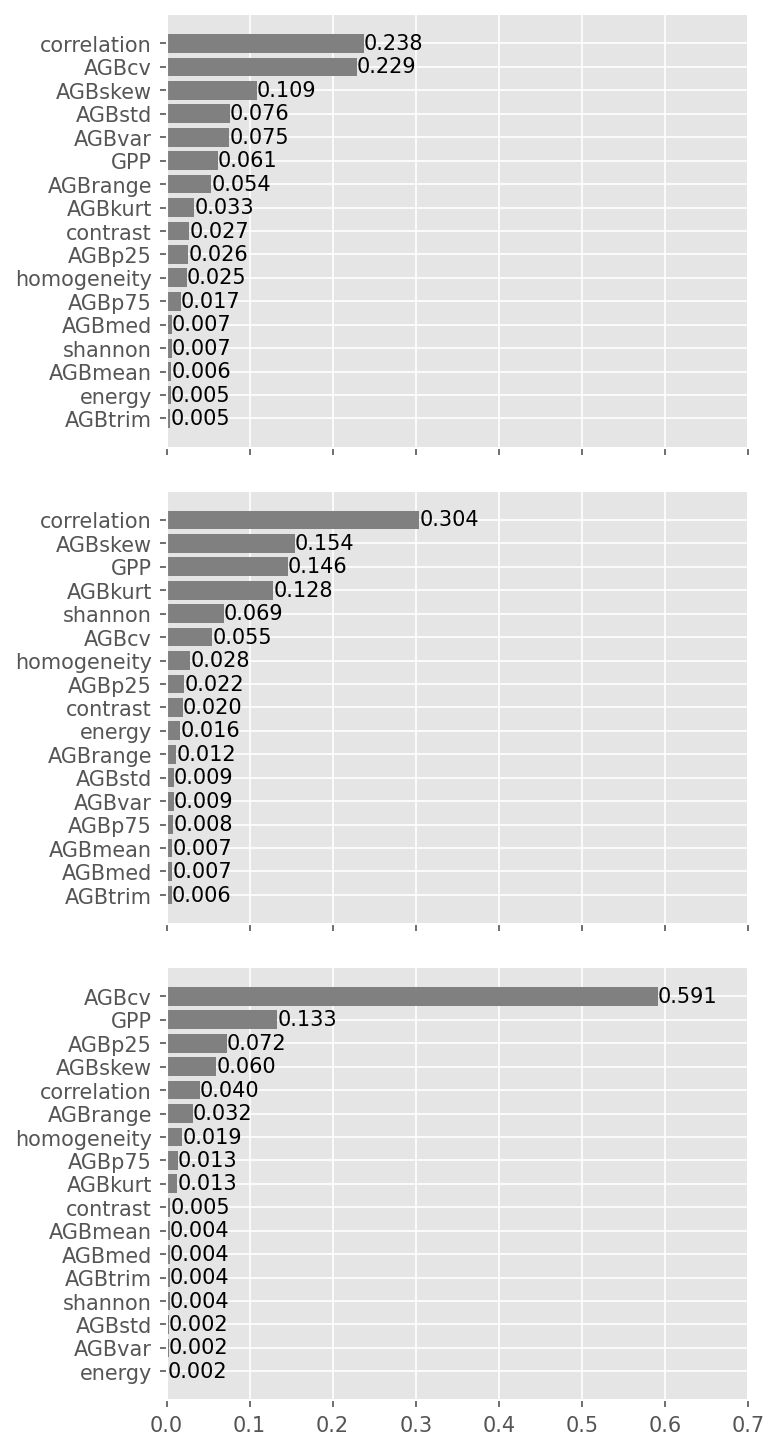

In [24]:
fig, axs = plt.subplots(3,sharex=True)
bars = axs[0].barh(feature_importances1.index.ravel(),feature_importances1.values.ravel(),color='gray')#color='#0057b7'
#ax.invert_yaxis() 
axs[0].bar_label(bars,fmt='%.3f')
axs[0].set_xlim(right=0.7)
#axs[0].set_xlabel('feature importance')


bars = axs[1].barh(feature_importances2.index.ravel(),feature_importances2.values.ravel(),color='gray')#color='#0057b7'
#ax.invert_yaxis() 
axs[1].bar_label(bars,fmt='%.3f')
axs[1].set_xlim(right=0.7)
#axs[1].set_xlabel('feature importance')

bars = axs[2].barh(feature_importances3.index.ravel(),feature_importances3.values.ravel(),color='gray')#color='#0057b7'
    #ax.invert_yaxis() 
axs[2].bar_label(bars,fmt='%.3f')
axs[2].set_xlim(right=0.7)

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.rcParams['figure.figsize'] = (5,12)
#plt.savefig('./newplot/Kb[0.025:0.2]/barh_4_short.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [25]:
%store feature_importances1
%store feature_importances2
%store feature_importances3


Stored 'feature_importances1' (DataFrame)
Stored 'feature_importances2' (DataFrame)
Stored 'feature_importances3' (DataFrame)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colors1 = plt.cm.YlGn(np.linspace(0., 1, 11))
colors2 = plt.cm.OrRd(np.linspace(0, 1, 4))
colors3 = plt.cm.OrRd(np.linspace(0, 1, 4))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


In [30]:
Single_mus = []
Single_Iss = []
Single_as =[]

for i in range(0,len(feature_importances1.index)-1):
    mu_features = feature_importances1.index
    alpha_features = feature_importances2.index
    beta_features = feature_importances3.index
    
    exclude_features1 = mu_features[:i+1]
    exclude_features2 = alpha_features[:i+1]
    exclude_features3 = beta_features[:i+1]
    
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    
    for f in exclude_features1:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    
    mu_nse,mu_model = SingleRF_1(df_train, df_test, 'mu')
    
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    for f in exclude_features2:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    alpha_nse,alpha_model = SingleRF_1(df_train, df_test, 'alpha')
    
    df_train = df_all.iloc[train_index[0]]
    df_test = df_all.iloc[test_index[0]]
    for f in exclude_features3:
        del df_train[f] # df_train = df_train.drop(f,1)
        del df_test[f]
    beta_nse,beta_model = SingleRF_1(df_train, df_test, 'beta')

    
    Single_mus.append(mu_nse)
    Single_Iss.append(beta_nse)
    Single_as.append(alpha_nse)

KeyboardInterrupt: 

In [19]:
%store Single_mus
%store Single_Iss
%store Single_as

Stored 'Multi_mus' (list)
Stored 'Multi_Iss' (list)
Stored 'Multi_as' (list)


In [31]:
%store -r feature_importances1
%store -r feature_importances2
%store -r feature_importances3
%store -r Single_mus
%store -r Single_Iss
%store -r Single_as

In [32]:
new_column_names = {'mean_bio':'AGBmean',
                    'median_bio':'AGBmed',
                    'range_bio':'AGBrange',
                    'var_bio':'AGBvar',
                    'std_bio':'AGBstd',
                    'cv_bio':'AGBcv',
                    'skew_bio':'AGBskew',
                    'kurt_bio':'AGBkurt',
                    'prc25_bio':'AGBp25',
                    'prc75_bio':'AGBp75',
                    'Trimean':'AGBtrim'}
FI1 = feature_importances1.rename(columns=new_column_names)
FI2 = feature_importances2.rename(columns=new_column_names)
FI3 = feature_importances3.rename(columns=new_column_names)

mu_features = FI1.index
alpha_features = FI2.index
beta_features = FI3.index

# single RF prediction accuracy

NSE_mus = np.concatenate((all_features_mu,np.array(Single_mus).flatten()))
NSE_alpha = np.concatenate((all_features_a,np.array(Single_as).flatten()))
NSE_beta = np.concatenate((all_features_b,np.array(Single_Iss).flatten()))
display(FI1)
display(FI2)
display(FI3)
display(NSE_mus)
display(NSE_alpha)
display(NSE_beta)

,importance
AGBtrim,0.004541
energy,0.005015
AGBmean,0.005619
shannon,0.006512
AGBmed,0.006658
AGBp75,0.017413
homogeneity,0.024721
AGBp25,0.026192
contrast,0.027429
AGBkurt,0.033479


,importance
AGBtrim,0.006455
AGBmed,0.006801
AGBmean,0.006932
AGBp75,0.008040
AGBvar,0.008761
AGBstd,0.008977
AGBrange,0.011715
energy,0.016462
contrast,0.019552
AGBp25,0.021549


,importance
energy,0.001846
AGBvar,0.002409
AGBstd,0.002471
shannon,0.003534
AGBtrim,0.003556
AGBmed,0.003823
AGBmean,0.004186
contrast,0.004664
AGBkurt,0.012697
AGBp75,0.013310


array([ 0.98935932,  0.98987408,  0.98996863,  0.99000474,  0.99004961,
        0.99006207,  0.99016007,  0.98986896,  0.99166725,  0.99161455,
        0.99338921,  0.99295153,  0.94545946,  0.94517441,  0.55994231,
        0.31253233, -0.07381072])

array([ 0.92990165,  0.94208389,  0.94236829,  0.9421936 ,  0.94210697,
        0.94198236,  0.94171474,  0.9400623 ,  0.94032825,  0.91917496,
        0.9191575 ,  0.92092115,  0.90705988,  0.86386828,  0.63014765,
        0.43070501, -0.10947061])

array([0.98318715, 0.98435126, 0.98435998, 0.98441518, 0.98436788,
       0.98447081, 0.98467721, 0.98467021, 0.98463071, 0.98511906,
       0.98508097, 0.98242368, 0.98191911, 0.98019876, 0.98053383,
       0.9506269 , 0.44350156])

In [33]:
%store FI1
%store FI2
%store FI3
%store NSE_mus
%store NSE_alpha
%store NSE_beta

Stored 'FI1' (DataFrame)
Stored 'FI2' (DataFrame)
Stored 'FI3' (DataFrame)
Stored 'NSE_mus' (ndarray)
Stored 'NSE_alpha' (ndarray)
Stored 'NSE_beta' (ndarray)


In [2]:
%store -r FI1
%store -r FI2
%store -r FI3
%store -r NSE_mus
%store -r NSE_alpha
%store -r NSE_beta
mu_features = FI1.index
alpha_features = FI2.index
beta_features = FI3.index

/tmp/ipykernel_29747/1725650146.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(x,rotation=30)
/tmp/ipykernel_29747/1725650146.py:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bars = ax.bar(FI1.index.ravel(),FI1.values.ravel(),color='gray',alpha=0.7)
/tmp/ipykernel_29747/1725650146.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(x,rotation=30)
/tmp/ipykernel_29747/1725650146.py:33: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bars = ax.bar(FI2.index.ravel(),FI2.values.ravel(),color='gray',alpha=0.7)
/tmp/ipykernel_29747/1725650146.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=30)
/tmp/ipykernel_29747/1725650146.py:49: UserWarning: FixedFormatter should only be us

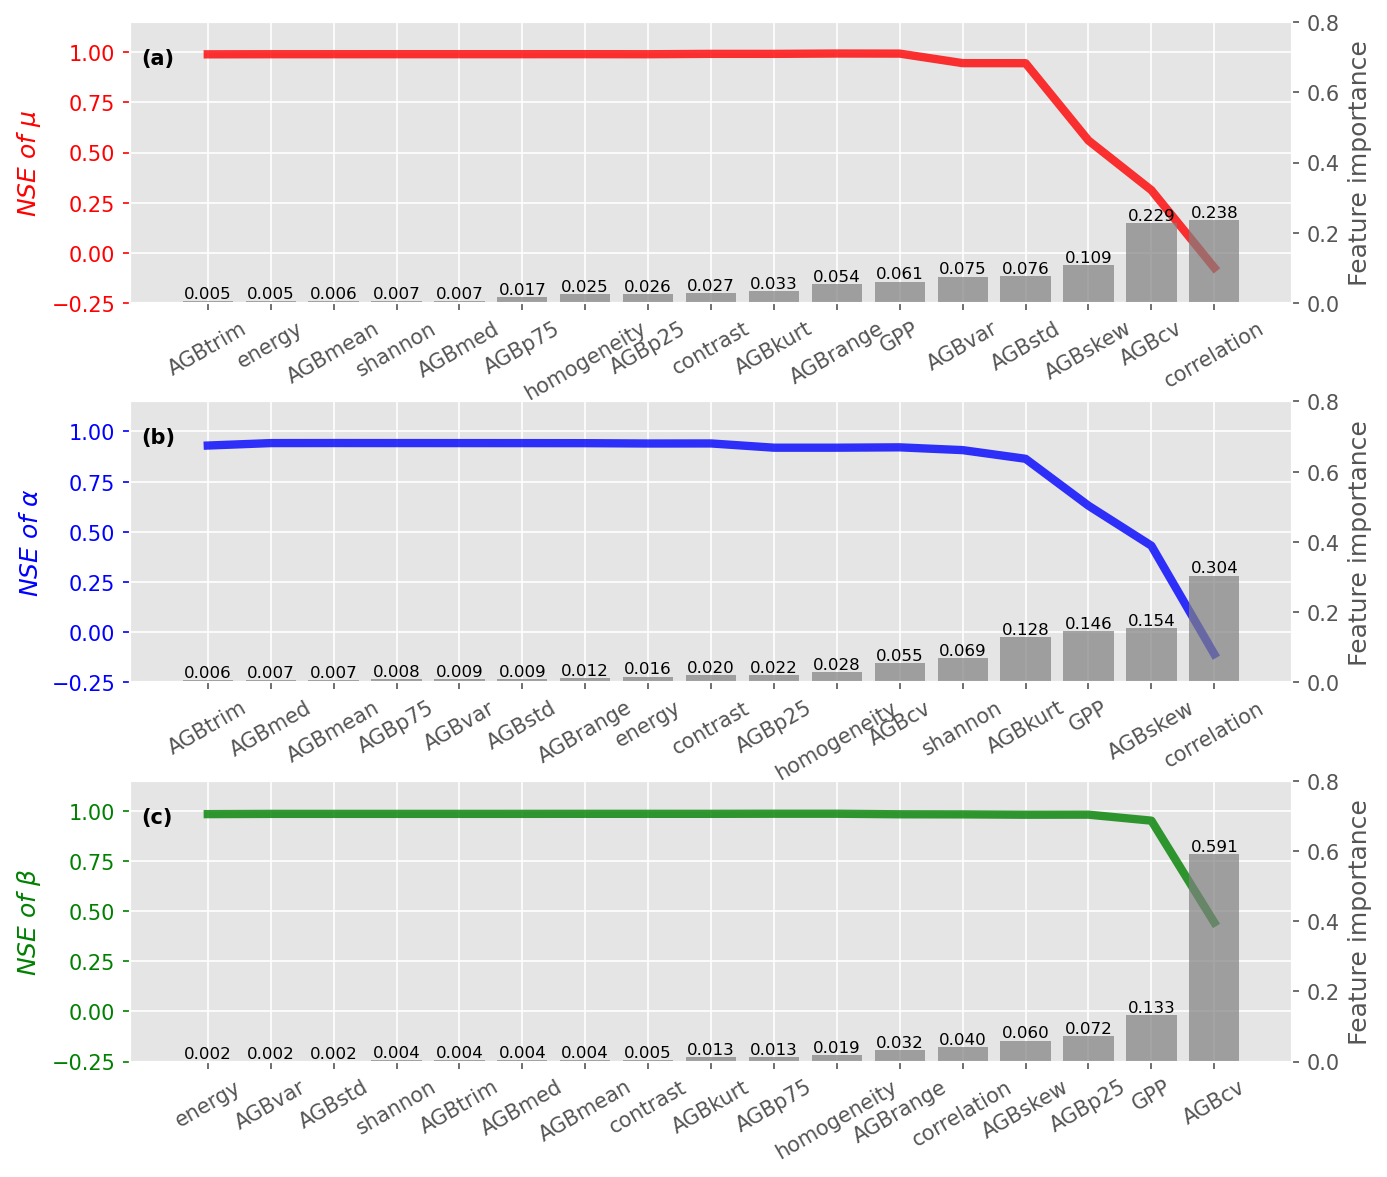

In [12]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,9)

fig,axs = plt.subplots(3)

x = list(mu_features)
axs[0].plot(x,NSE_mus,c = 'r',linewidth=4,alpha=0.8,label = r'$accuracy\ of\ \mu$')
axs[0].tick_params(axis='y', colors='red')
axs[0].set_xticklabels(x,rotation=30)
axs[0].set_ylabel(r'$NSE\ of\ \mu$',color='r')
axs[0].set_ylim(-0.25,1.15)
#axs[0].grid(False)
ax = axs[0].twinx()
bars = ax.bar(FI1.index.ravel(),FI1.values.ravel(),color='gray',alpha=0.7)
ax.bar_label(bars,fmt='%.3f',fontsize=8)
ax.set_ylabel('Feature importance')
ax.set_ylim(0,0.8)
ax.text(0.01,0.85,'(a)',fontweight='bold', transform=axs[0].transAxes)
ax.grid(False)




x = list(alpha_features)
axs[1].plot(x,NSE_alpha,c = 'b',linewidth=4,alpha=0.8,label = r'$accuracy\ of\ \alpha$')
axs[1].tick_params(axis='y', colors='b')
axs[1].set_ylabel(r'$NSE\ of\ \alpha$',color='b')
axs[1].set_xticklabels(x,rotation=30)
axs[1].set_ylim(-0.25,1.15)
#axs[1].grid(False)
ax = axs[1].twinx()
bars = ax.bar(FI2.index.ravel(),FI2.values.ravel(),color='gray',alpha=0.7)
ax.bar_label(bars,fmt='%.3f',fontsize=8)
ax.set_xticklabels(x,rotation=30)
ax.set_ylabel('Feature importance')
ax.set_ylim(0,0.8)
ax.text(0.01,0.85,'(b)',fontweight='bold',transform=axs[1].transAxes)
ax.grid(False)





x = list(beta_features)
axs[2].plot(x,NSE_beta,c = 'g',linewidth=4,alpha=0.8,label = r'$accuracy\ of\ \beta$')
axs[2].tick_params(axis='y', colors='g')
axs[2].set_ylabel(r'$NSE\ of\ \beta$',color='g')
axs[2].set_xticklabels(x,rotation=30)
axs[2].set_ylim(-0.25,1.15)
#axs[2].grid(False)
ax = axs[2].twinx()
bars = ax.bar(FI3.index.ravel(),FI3.values.ravel(),color='gray',alpha=0.7)
ax.bar_label(bars,fmt='%.3f',fontsize=8)
ax.set_xticklabels(x,rotation=30)
ax.set_ylabel('Feature importance')
ax.set_ylim(0,0.8)
ax.text(0.01,0.85,'(c)',fontweight='bold',transform=axs[2].transAxes)
ax.grid(False)




plt.subplots_adjust(wspace=0, hspace=0.35)
#plt.savefig('./Reduce_kb.png',dpi=300,bbox_inches = 'tight')

plt.savefig('./Figure8.png',dpi=300,bbox_inches = 'tight')
plt.show()